# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# **Load Dataset**

In [ ]:
df = pd.read_csv("/content/Dataset/AAPL Dataset.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600


# **Data Cleaning**

## Handle Missing or Null Values

In [ ]:
df.isnull().sum()
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600


## Format the Date Column

In [ ]:
df = pd.DataFrame(df)
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [ ]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows where 'Date' couldn't be parsed
df = df.dropna(subset=['Date'])

# Extract day of the week and month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month


In [ ]:
df = df.sort_values('Date')
df.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64
DayOfWeek,int32
Month,int32


## Normalize/Scale Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
df[["Open","High","Low","Close","Adj Close","Volume"]] = Scaler.fit_transform(df[["Open","High","Low","Close","Adj Close","Volume"]])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,DayOfWeek,Month
0,1980-12-12,0.000401,0.000400,0.000406,0.000403,0.000313,0.063198,4,12
1,1980-12-15,0.000370,0.000366,0.000372,0.000369,0.000287,0.023699,0,12
2,1980-12-16,0.000324,0.000321,0.000326,0.000324,0.000251,0.014246,1,12
3,1980-12-17,0.000336,0.000335,0.000340,0.000338,0.000262,0.011647,2,12
4,1980-12-18,0.000353,0.000352,0.000357,0.000355,0.000276,0.009897,3,12


# **Feature Engineering**

## Calculate Daily Return

In [ ]:
df["Daily Return"] = df["Close"].pct_change()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,DayOfWeek,Month,Daily Return
0,1980-12-12,0.000401,0.000400,0.000406,0.000403,0.000313,0.063198,4,12,NaN
1,1980-12-15,0.000370,0.000366,0.000372,0.000369,0.000287,0.023699,0,12,-0.084502
2,1980-12-16,0.000324,0.000321,0.000326,0.000324,0.000251,0.014246,1,12,-0.123082
3,1980-12-17,0.000336,0.000335,0.000340,0.000338,0.000262,0.011647,2,12,0.043857
4,1980-12-18,0.000353,0.000352,0.000357,0.000355,0.000276,0.009897,3,12,0.050432


## Lag Features — Past Price Influence

In [ ]:
df['Close Prev-1'] = df['Close'].shift(1)
df['Close Prev-2'] = df['Close'].shift(2)
df['High Prev-1'] = df['High'].shift(1)
df['High Prev-2'] = df['High'].shift(2)
df['Open Prev-1'] = df['Open'].shift(1)
df['Open Prev-2'] = df['Open'].shift(2)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,DayOfWeek,Month,Daily Return,Close Prev-1,Close Prev-2,High Prev-1,High Prev-2,Open Prev-1,Open Prev-2
0,1980-12-12,0.000401,0.000400,0.000406,0.000403,0.000313,0.063198,4,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1980-12-15,0.000370,0.000366,0.000372,0.000369,0.000287,0.023699,0,12,-0.084502,0.000403,NaN,0.000400,NaN,0.000401,NaN
2,1980-12-16,0.000324,0.000321,0.000326,0.000324,0.000251,0.014246,1,12,-0.123082,0.000369,0.000403,0.000366,0.000400,0.000370,0.000401
3,1980-12-17,0.000336,0.000335,0.000340,0.000338,0.000262,0.011647,2,12,0.043857,0.000324,0.000369,0.000321,0.000366,0.000324,0.000370
4,1980-12-18,0.000353,0.000352,0.000357,0.000355,0.000276,0.009897,3,12,0.050432,0.000338,0.000324,0.000335,0.000321,0.000336,0.000324


## Price Volatility — Range-Based Momentum

In [ ]:
df['Price_Range'] = df['High'] - df['Low']
df['Daily_Change'] = df['Close'] - df['Open']
df['Daily_Change'] = df['Daily_Change'].round(6)

##  Volume Spike — Demand Pressure Insight

In [ ]:
df['Volume_Change'] = df['Volume'].pct_change()

## Technical Indicator — Momentum Strength

### Relative Strength Index (RSI)

In [ ]:
!pip install ta

In [ ]:
import ta
df["RSI"] = ta.momentum.RSIIndicator(df["Close"]).rsi()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,DayOfWeek,Month,Daily Return,Close Prev-1,Close Prev-2,High Prev-1,High Prev-2,Open Prev-1,Open Prev-2,Price_Range,Daily_Change,Volume_Change,RSI
0,1980-12-12,0.000401,0.000400,0.000406,0.000403,0.000313,0.063198,4,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000006,0.000002,NaN,NaN
1,1980-12-15,0.000370,0.000366,0.000372,0.000369,0.000287,0.023699,0,12,-0.084502,0.000403,NaN,0.000400,NaN,0.000401,NaN,-0.000006,-0.000000,-0.625006,NaN
2,1980-12-16,0.000324,0.000321,0.000326,0.000324,0.000251,0.014246,1,12,-0.123082,0.000369,0.000403,0.000366,0.000400,0.000370,0.000401,-0.000005,-0.000000,-0.398879,NaN
3,1980-12-17,0.000336,0.000335,0.000340,0.000338,0.000262,0.011647,2,12,0.043857,0.000324,0.000369,0.000321,0.000366,0.000324,0.000370,-0.000005,0.000002,-0.182415,NaN
4,1980-12-18,0.000353,0.000352,0.000357,0.000355,0.000276,0.009897,3,12,0.050432,0.000338,0.000324,0.000335,0.000321,0.000336,0.000324,-0.000005,0.000002,-0.150298,NaN


### Moving Averages — Smoothed Trend Insight

In [ ]:
df["SMA10"] = df.Close.rolling(10).mean()
df["SMA20"] = df.Close.rolling(20).mean()
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,DayOfWeek,Month,Daily Return,Close Prev-1,Close Prev-2,High Prev-1,High Prev-2,Open Prev-1,Open Prev-2,Price_Range,Daily_Change,Volume_Change,RSI,SMA10,SMA20
0,1980-12-12,0.000401,0.000400,0.000406,0.000403,0.000313,0.063198,4,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000006,0.000002,NaN,NaN,NaN,NaN
1,1980-12-15,0.000370,0.000366,0.000372,0.000369,0.000287,0.023699,0,12,-0.084502,0.000403,NaN,0.000400,NaN,0.000401,NaN,-0.000006,-0.000000,-0.625006,NaN,NaN,NaN
2,1980-12-16,0.000324,0.000321,0.000326,0.000324,0.000251,0.014246,1,12,-0.123082,0.000369,0.000403,0.000366,0.000400,0.000370,0.000401,-0.000005,-0.000000,-0.398879,NaN,NaN,NaN
3,1980-12-17,0.000336,0.000335,0.000340,0.000338,0.000262,0.011647,2,12,0.043857,0.000324,0.000369,0.000321,0.000366,0.000324,0.000370,-0.000005,0.000002,-0.182415,NaN,NaN,NaN
4,1980-12-18,0.000353,0.000352,0.000357,0.000355,0.000276,0.009897,3,12,0.050432,0.000338,0.000324,0.000335,0.000321,0.000336,0.000324,-0.000005,0.000002,-0.150298,NaN,NaN,NaN


## Target Variable — Future Prediction Label

In [ ]:
df['Target High'] = df['High'].shift(-1)
df['Target Low'] = df['Low'].shift(-1)
df['Target Close'] = df['Close'].shift(-1)
df['Target Open'] = df['Open'].shift(-1)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,DayOfWeek,Month,Daily Return,Close Prev-1,Close Prev-2,High Prev-1,High Prev-2,Open Prev-1,Open Prev-2,Price_Range,Daily_Change,Volume_Change,RSI,SMA10,SMA20,Target High,Target Low,Target Close,Target Open
0,1980-12-12,0.000401,0.000400,0.000406,0.000403,0.000313,0.063198,4,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000006,0.000002,NaN,NaN,NaN,NaN,0.000366,0.000372,0.000369,0.000370
1,1980-12-15,0.000370,0.000366,0.000372,0.000369,0.000287,0.023699,0,12,-0.084502,0.000403,NaN,0.000400,NaN,0.000401,NaN,-0.000006,-0.000000,-0.625006,NaN,NaN,NaN,0.000321,0.000326,0.000324,0.000324
2,1980-12-16,0.000324,0.000321,0.000326,0.000324,0.000251,0.014246,1,12,-0.123082,0.000369,0.000403,0.000366,0.000400,0.000370,0.000401,-0.000005,-0.000000,-0.398879,NaN,NaN,NaN,0.000335,0.000340,0.000338,0.000336
3,1980-12-17,0.000336,0.000335,0.000340,0.000338,0.000262,0.011647,2,12,0.043857,0.000324,0.000369,0.000321,0.000366,0.000324,0.000370,-0.000005,0.000002,-0.182415,NaN,NaN,NaN,0.000352,0.000357,0.000355,0.000353
4,1980-12-18,0.000353,0.000352,0.000357,0.000355,0.000276,0.009897,3,12,0.050432,0.000338,0.000324,0.000335,0.000321,0.000336,0.000324,-0.000005,0.000002,-0.150298,NaN,NaN,NaN,0.000389,0.000394,0.000392,0.000390


## Dropping Rows with Missing Values

In [ ]:
df.shape

(10836, 26)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(10816, 26)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,DayOfWeek,Month,Daily Return,Close Prev-1,Close Prev-2,High Prev-1,High Prev-2,Open Prev-1,Open Prev-2,Price_Range,Daily_Change,Volume_Change,RSI,SMA10,SMA20,Target High,Target Low,Target Close,Target Open
19,1981-01-12,0.000472,0.000467,0.000472,0.000469,0.000364,0.003193,0,1,-0.011975,0.000474,0.000438,0.000470,0.000434,0.000472,0.000438,-0.000004,-0.000003,0.102083,52.729429,0.000501,0.000456,0.000439,0.000446,0.000443,0.000444
20,1981-01-13,0.000444,0.000439,0.000446,0.000443,0.000344,0.003106,1,1,-0.054542,0.000469,0.000474,0.000467,0.000470,0.000472,0.000472,-0.000007,-0.000000,-0.027410,47.808888,0.000488,0.000458,0.000442,0.000449,0.000446,0.000444
21,1981-01-14,0.000444,0.000442,0.000449,0.000446,0.000346,0.001926,2,1,0.006410,0.000443,0.000469,0.000439,0.000467,0.000444,0.000472,-0.000007,0.000002,-0.379981,48.385225,0.000478,0.000461,0.000459,0.000463,0.000460,0.000458
22,1981-01-15,0.000458,0.000459,0.000463,0.000460,0.000357,0.001895,3,1,0.031845,0.000446,0.000443,0.000442,0.000439,0.000444,0.000444,-0.000004,0.000002,-0.015674,51.282055,0.000472,0.000468,0.000451,0.000457,0.000455,0.000455
23,1981-01-16,0.000455,0.000451,0.000457,0.000455,0.000353,0.001805,4,1,-0.012345,0.000460,0.000446,0.000459,0.000442,0.000458,0.000444,-0.000007,-0.000000,-0.047771,50.071501,0.000464,0.000474,0.000493,0.000500,0.000497,0.000495


# **Detecting & Handling Outliers**

## Raw Data Plot (With Outliers)

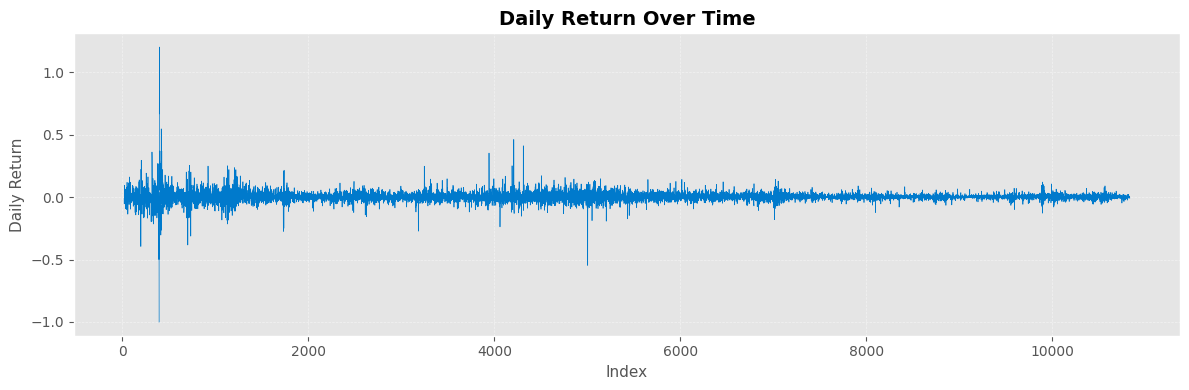

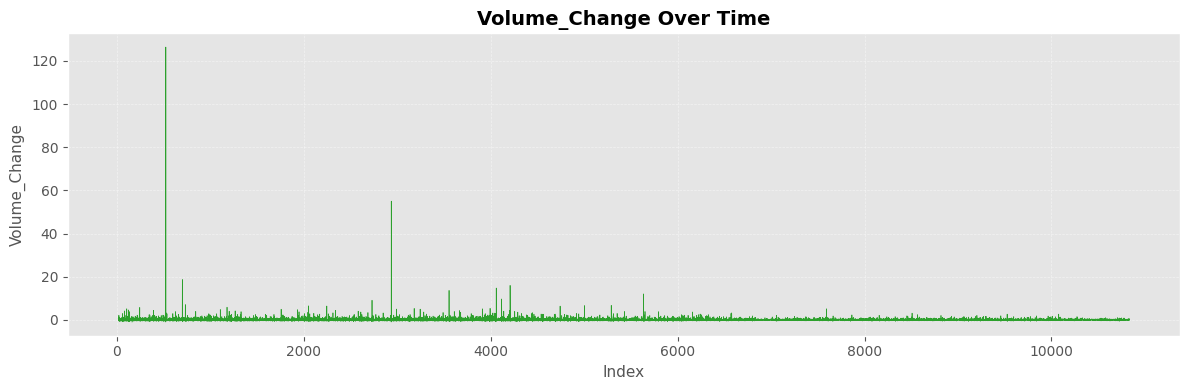

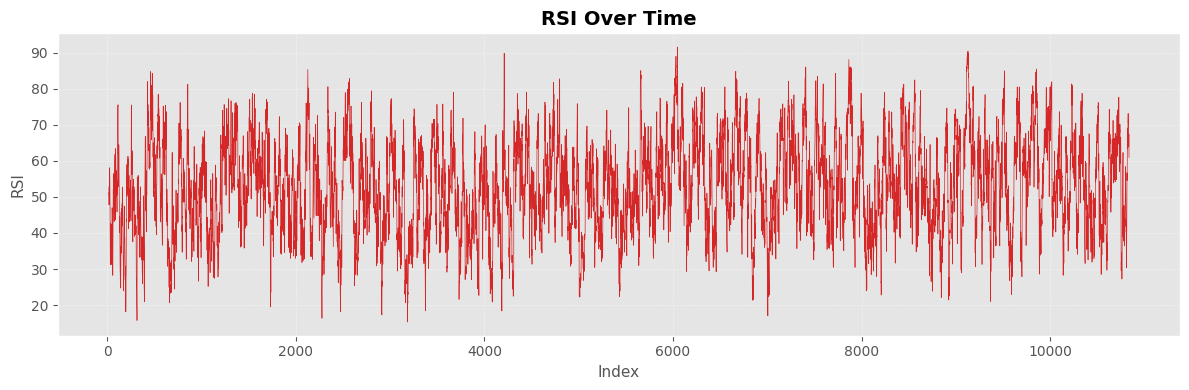

In [ ]:
plt.style.use('ggplot')

outlier_features = ['Daily Return', 'Volume_Change', 'RSI']
colors = ['#007acc', '#2ca02c', '#d62728']  # Soft professional colors

for feature, color in zip(outlier_features, colors):
    plt.figure(figsize=(12, 4))
    plt.plot(df.index, df[feature], color=color, linewidth=0.5)
    plt.title(f'{feature} Over Time', fontsize=14, fontweight='semibold')
    plt.xlabel('Index', fontsize=11)
    plt.ylabel(feature, fontsize=11)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    plt.tight_layout()
    plt.show()


## Treating Outliers in the Dataset

In [ ]:
df['Daily Return'] = df['Daily Return'].clip(lower=-0.5, upper=0.5)

df['Volume_Change'] = df['Volume_Change'].clip(lower=df['Volume_Change'].min(), upper=20)

print(df[['Daily Return', 'Volume_Change']].describe())


       Daily Return  Volume_Change
count  10816.000000   10816.000000
mean       0.001505       0.116068
std        0.040808       0.752592
min       -0.500000      -1.000000
25%       -0.014929      -0.227768
50%        0.000000      -0.021622
75%        0.016654       0.268615
max        0.500000      20.000000


## Cleaned Data Plot (Outliers Treated)

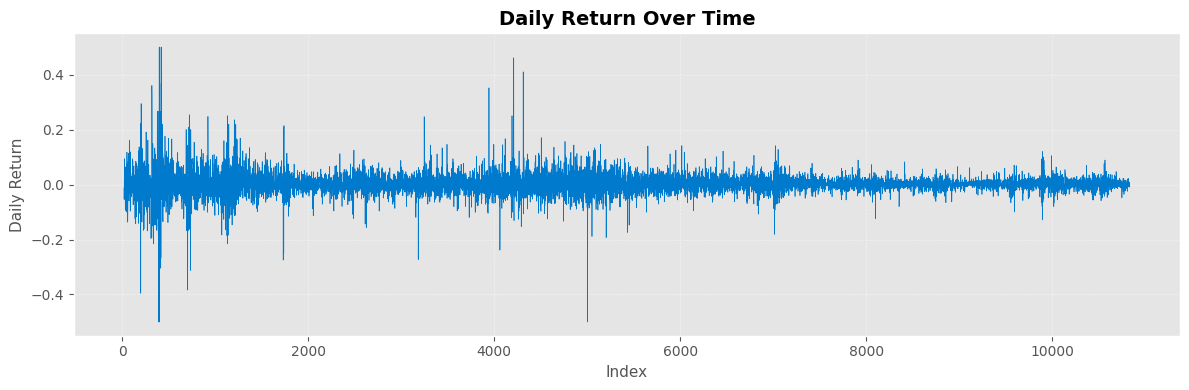

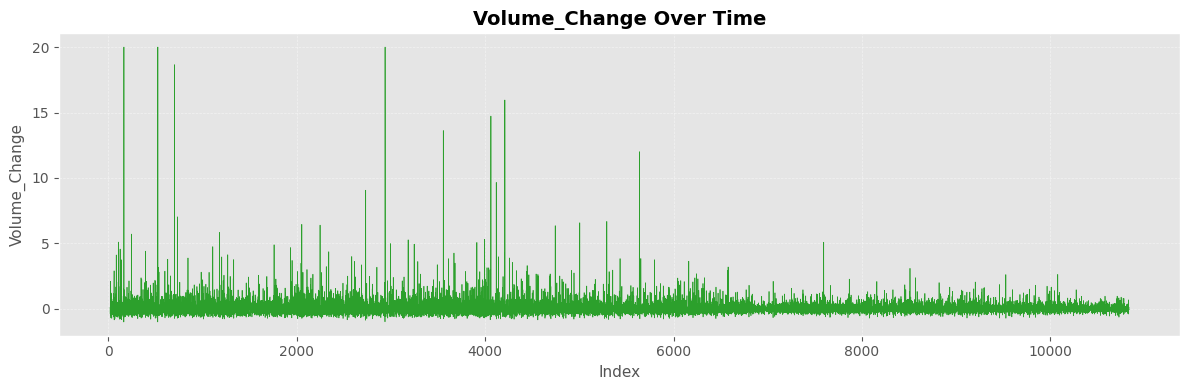

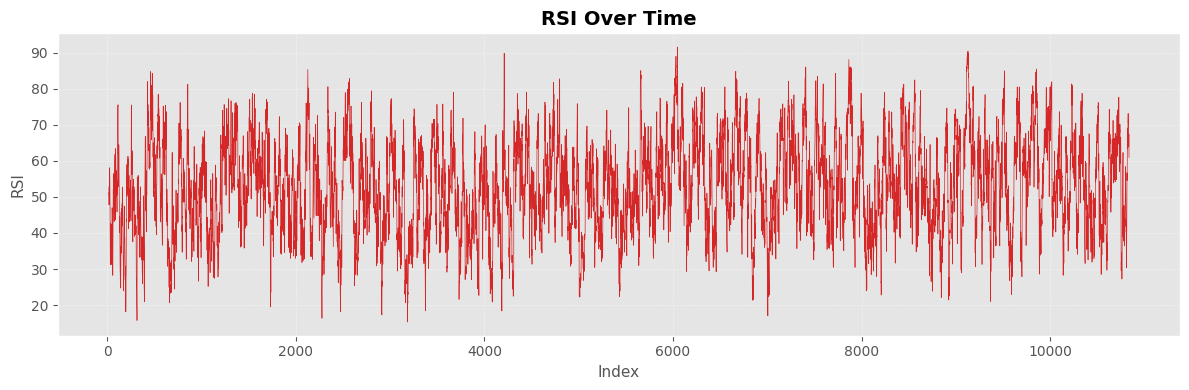

In [ ]:
plt.style.use('ggplot')

outlier_features = ['Daily Return', 'Volume_Change', 'RSI']
colors = ['#007acc', '#2ca02c', '#d62728']  # Soft professional colors

for feature, color in zip(outlier_features, colors):
    plt.figure(figsize=(12, 4))
    plt.plot(df.index, df[feature], color=color, linewidth=0.5)
    plt.title(f'{feature} Over Time', fontsize=14, fontweight='semibold')
    plt.xlabel('Index', fontsize=11)
    plt.ylabel(feature, fontsize=11)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    plt.tight_layout()
    plt.show()


# **Machine Learnig Model Building**

## Import Library

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

## Data Separation as X (Independent Variable) and Y (Dependent Variable)

In [ ]:
x = df.drop(["Target High",	"Target Low",	"Target Close","Target Open", "Date", "Adj Close"], axis=1)
x.head()

,Open,High,Low,Close,Volume,DayOfWeek,Month,Daily Return,Close Prev-1,Close Prev-2,High Prev-1,High Prev-2,Open Prev-1,Open Prev-2,Price_Range,Daily_Change,Volume_Change,RSI,SMA10,SMA20
19,0.000472,0.000467,0.000472,0.000469,0.003193,0,1,-0.011975,0.000474,0.000438,0.000470,0.000434,0.000472,0.000438,-0.000004,-0.000003,0.102083,52.729429,0.000501,0.000456
20,0.000444,0.000439,0.000446,0.000443,0.003106,1,1,-0.054542,0.000469,0.000474,0.000467,0.000470,0.000472,0.000472,-0.000007,-0.000000,-0.027410,47.808888,0.000488,0.000458
21,0.000444,0.000442,0.000449,0.000446,0.001926,2,1,0.006410,0.000443,0.000469,0.000439,0.000467,0.000444,0.000472,-0.000007,0.000002,-0.379981,48.385225,0.000478,0.000461
22,0.000458,0.000459,0.000463,0.000460,0.001895,3,1,0.031845,0.000446,0.000443,0.000442,0.000439,0.000444,0.000444,-0.000004,0.000002,-0.015674,51.282055,0.000472,0.000468
23,0.000455,0.000451,0.000457,0.000455,0.001805,4,1,-0.012345,0.000460,0.000446,0.000459,0.000442,0.000458,0.000444,-0.000007,-0.000000,-0.047771,50.071501,0.000464,0.000474


In [ ]:
y = df[["Target High", "Target Low", "Target Open", "Target Close"]]
y.head()


,Target High,Target Low,Target Open,Target Close
19,0.000439,0.000446,0.000444,0.000443
20,0.000442,0.000449,0.000444,0.000446
21,0.000459,0.000463,0.000458,0.000460
22,0.000451,0.000457,0.000455,0.000455
23,0.000493,0.000500,0.000495,0.000497


## Data Spliting

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(  x, y, test_size=0.2, random_state=42 )


## Train XGBoost Model (Multi-Output)

In [ ]:
models = {}
predictions = {}
scores = {}

for target in y.columns:
    print(f"\nTraining model for: {target}")
    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    model.fit(x_train, y_train[target])

    y_pred = model.predict(x_test)

    # Save model and predictions
    models[target] = model
    predictions[target] = y_pred

    # Evaluation
    rmse = np.sqrt(mean_squared_error(y_test[target], y_pred))
    r2 = r2_score(y_test[target], y_pred)

    scores[target] = {'RMSE': rmse, 'R2': r2}
    print(f"RMSE: {rmse:.4f} | R2: {r2:.4f}")


Training model for: Target High
RMSE: 0.0046 | R2: 0.9995

Training model for: Target Low
RMSE: 0.0040 | R2: 0.9996

Training model for: Target Open
RMSE: 0.0038 | R2: 0.9997

Training model for: Target Close
RMSE: 0.0053 | R2: 0.9994


# **Model Evaluation Summary**

In [ ]:
score_df = pd.DataFrame(scores).T
print("\nModel Performance:")
print(score_df)



Model Performance:
                  RMSE        R2
Target High   0.004571  0.999517
Target Low    0.003980  0.999629
Target Open   0.003832  0.999659
Target Close  0.005269  0.999356


# **Plot Feature Importance**

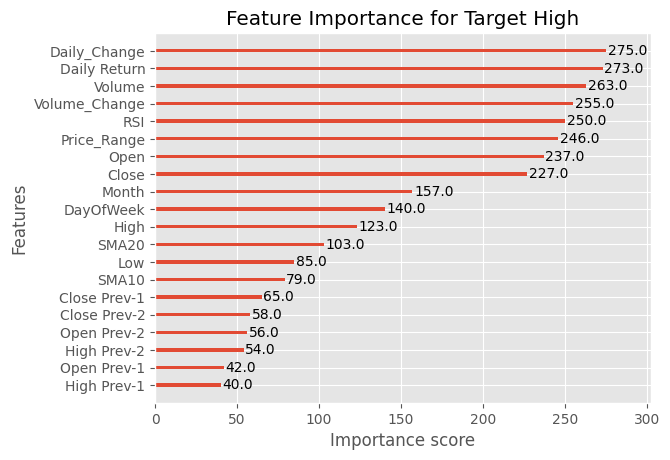

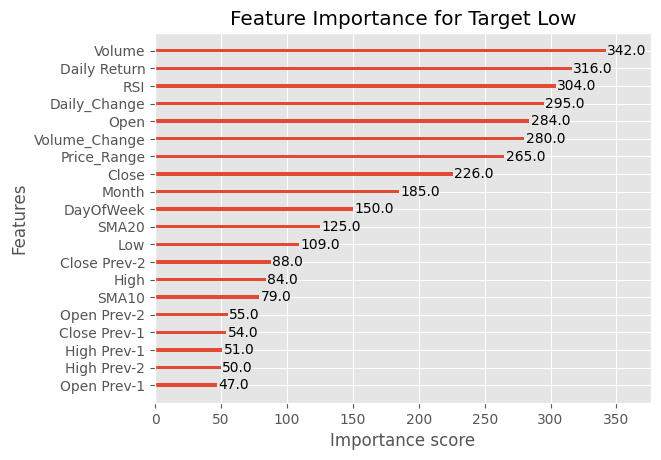

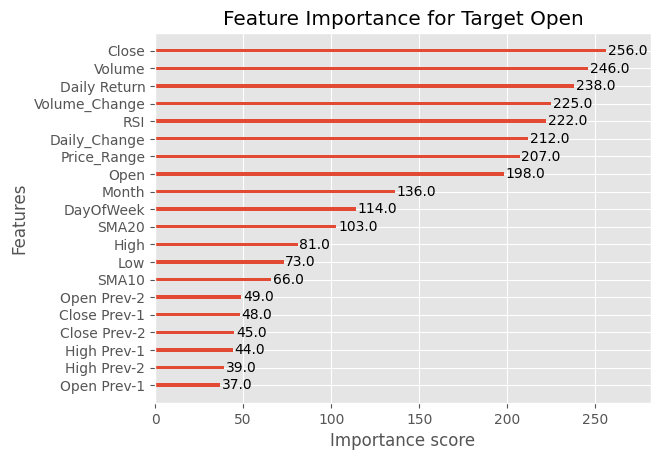

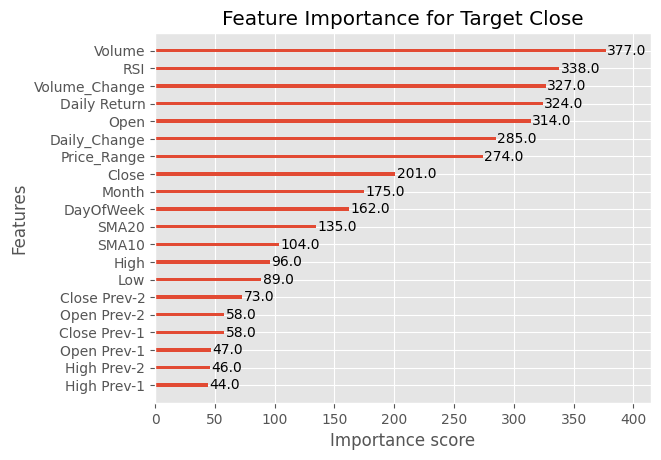

In [ ]:
for target in models:
    xgb.plot_importance(models[target], title=f'Feature Importance for {target}')
    plt.show()


# **Export Machine Learning Model**

In [ ]:
import joblib

# Save the trained models dictionary to a file
joblib.dump(models, 'AAPL Stock Predictor.pkl')

['AAPL Stock Predictor.pkl']